In [36]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [37]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df.shape    # Rows - 1338, Columns - 7

(1338, 7)

In [39]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
df1 = df.copy()

In [41]:
df.isnull().sum()    # As we can see there is no null values in the data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
df.duplicated().sum()

1

In [43]:
df.drop_duplicates(inplace=True)     # Dropping the duplicate values
df.duplicated().sum()

0

### EDA

In [44]:
# Seprating Catagorical And Numerical Columns
num_cols = df.dtypes[df.dtypes!=object].index
cat_cols = df.dtypes[df.dtypes==object].index
print(num_cols)
print(cat_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


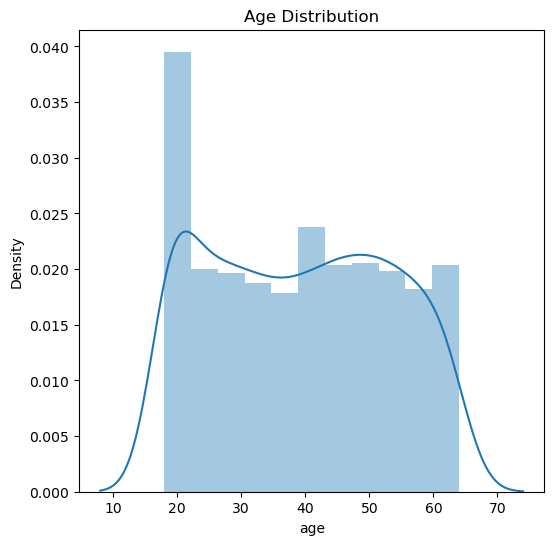

In [45]:
# distribution of age value
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

### Inference
According to the plot we can clearly see that in the of 21,22,23 people buy more insurance compare to another age group

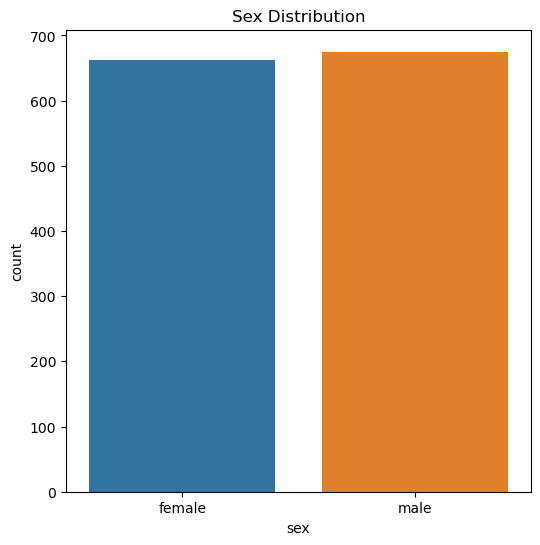

In [46]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = df)
plt.title('Sex Distribution')
plt.show()

### Inference
According to the data male are the ones who buy more insurance compare to female gender

In [47]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

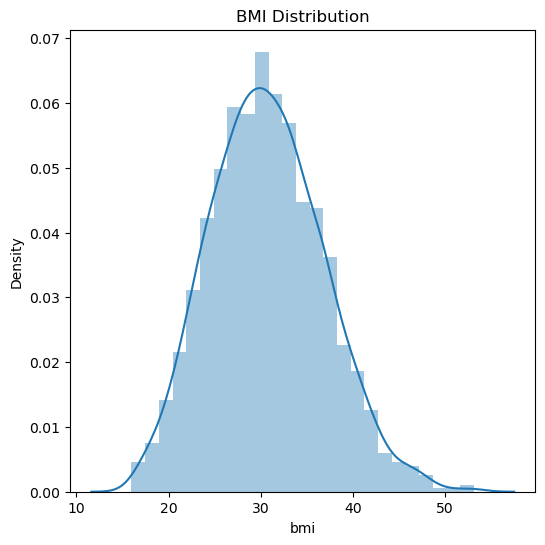

In [48]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

### Inference
According to the data BMI is normally distributed

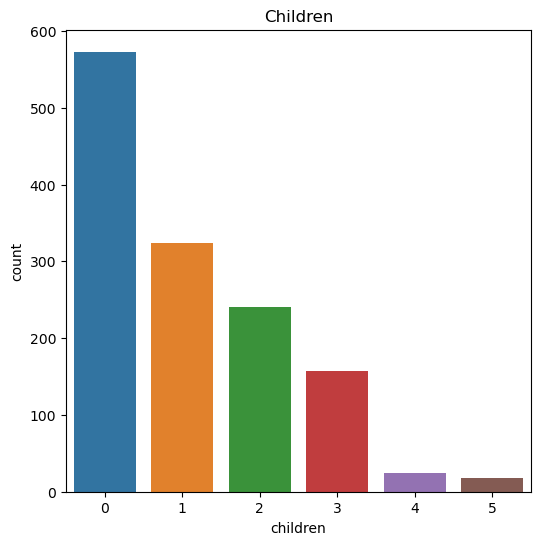

In [49]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

### Inference
According to the data family having no child buy more insurance

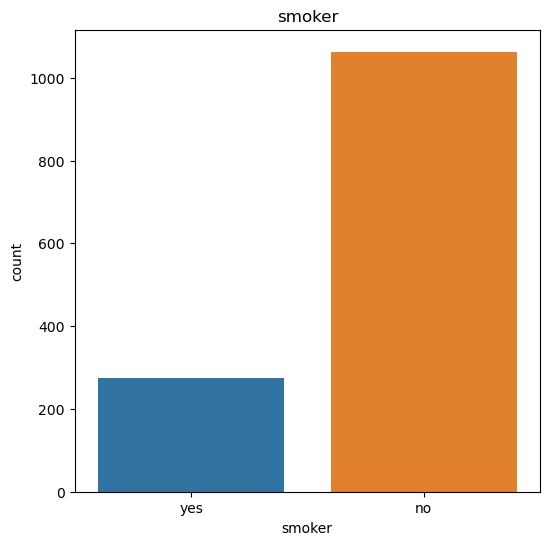

In [50]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

### Inference
According to the data non smoker buy more insurance

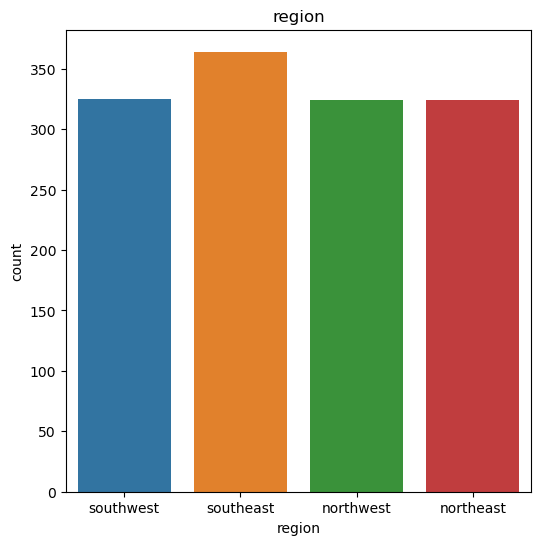

In [32]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

### Correlation

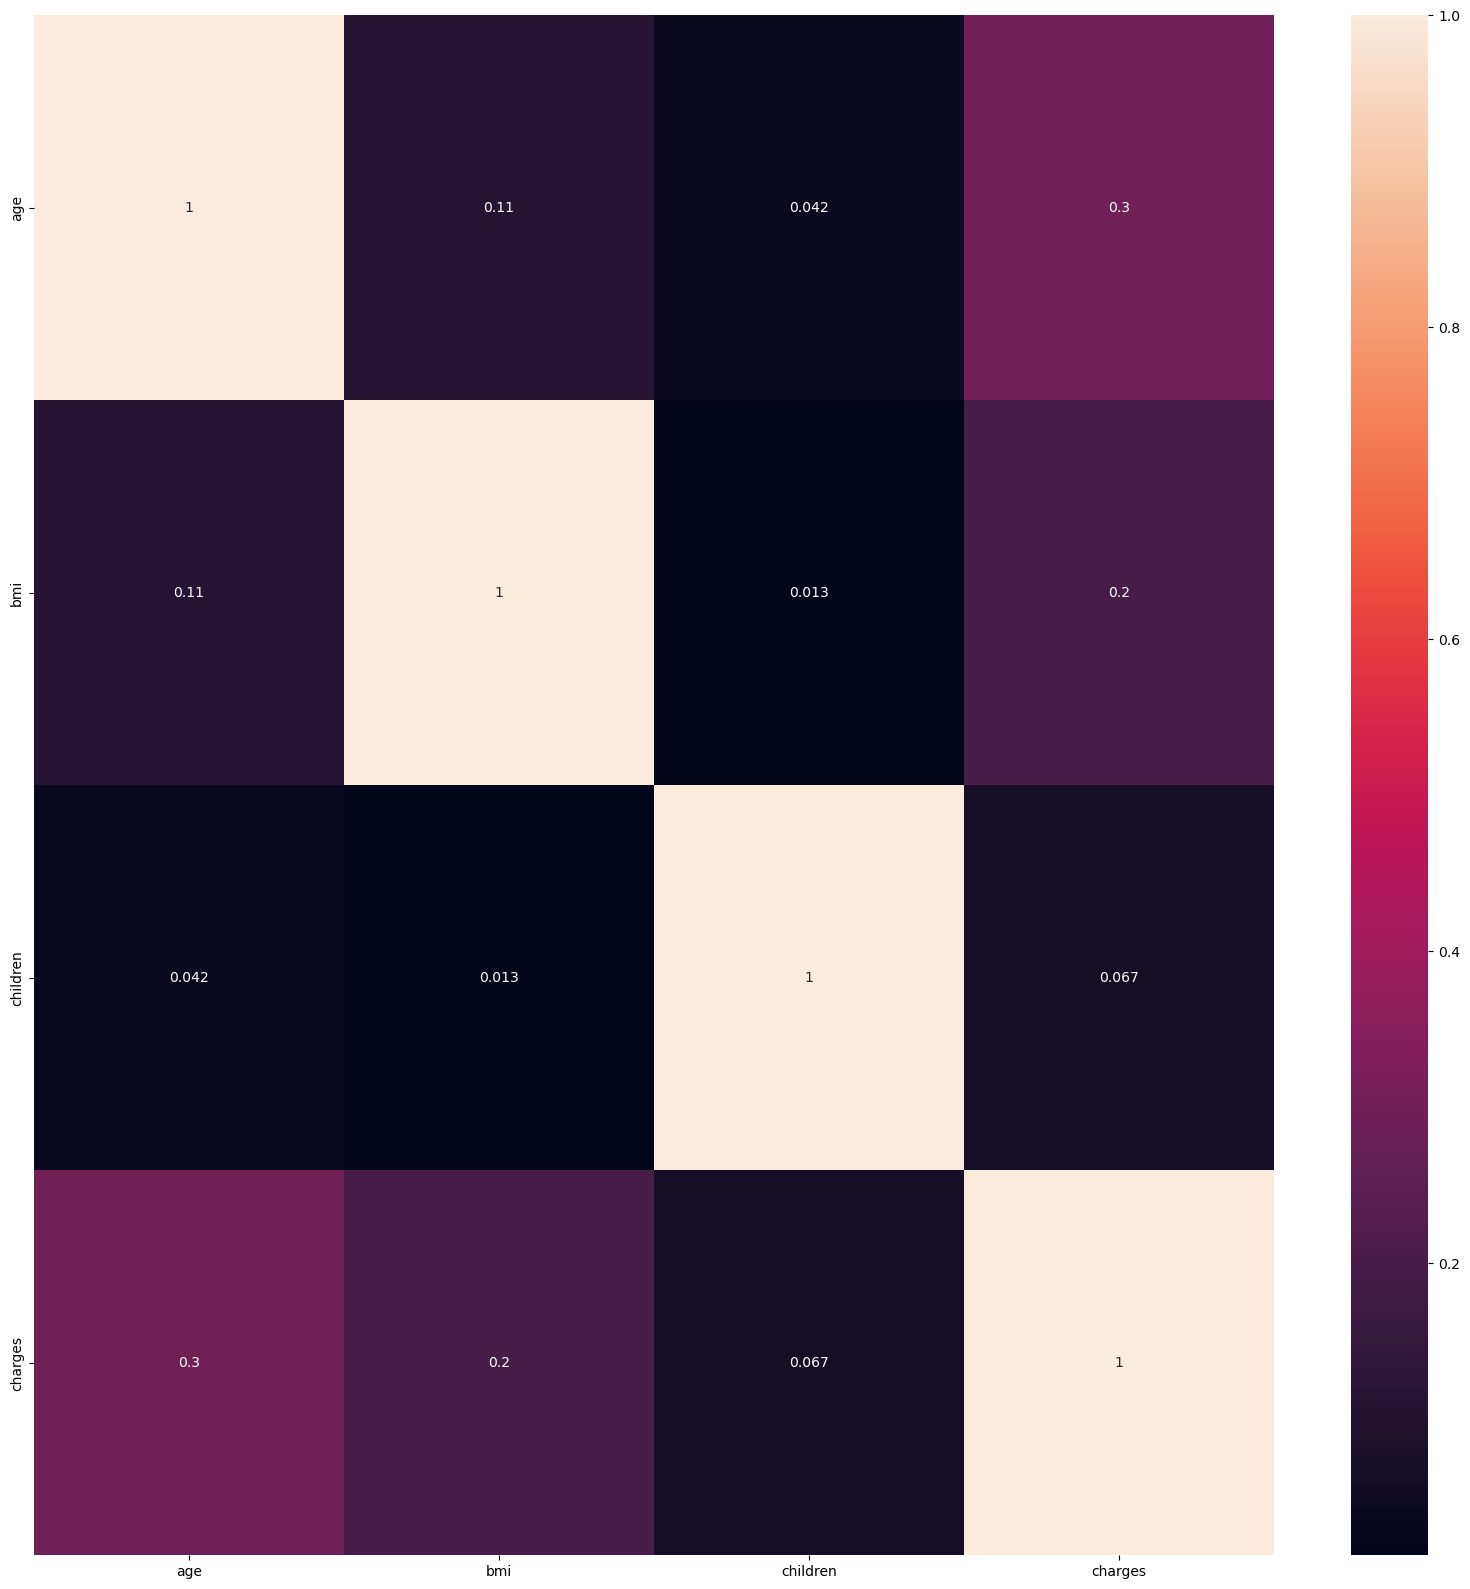

In [51]:
corr = df[num_cols].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

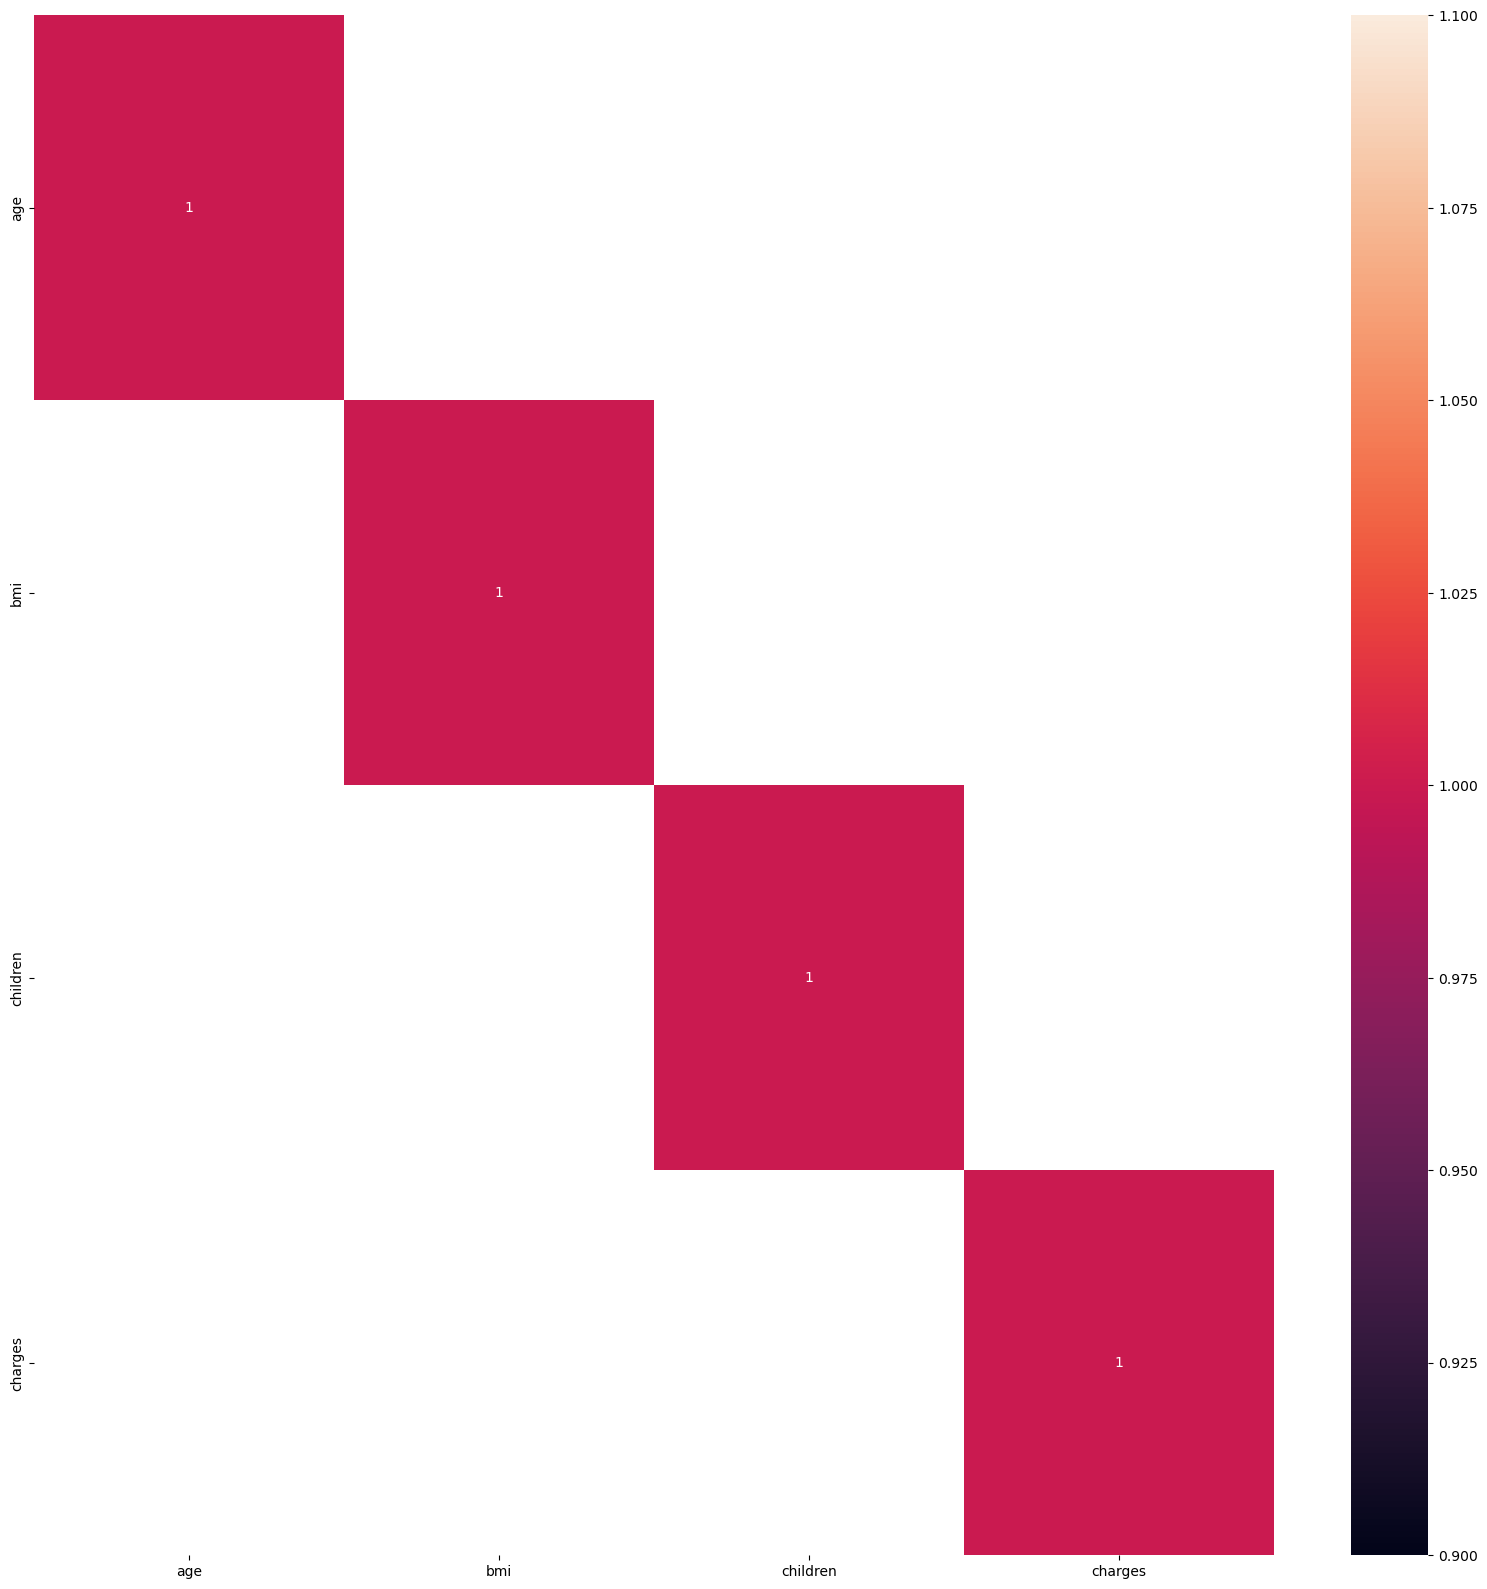

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7],annot=True)
plt.show()

### Inference
There is no features which are highly correlated

### Outlier Treatment

In [53]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
age,1337.0,39.222139,14.044333,18.0000,18.00000,18.0000,18.000000,18.00000,39.0000,62.0000,62.000000,63.000000,63.000000,64.000000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,17.89420,19.2692,19.957600,21.24800,30.4000,41.1080,41.800000,42.455200,43.920800,46.411200,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.00000,0.0000,0.000000,0.00000,1.0000,3.0000,3.000000,4.000000,4.000000,5.000000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,1252.95744,1621.7308,1636.040006,1767.49292,9386.1613,41210.0498,42920.126232,44495.190584,46677.324238,48537.796878,63770.42801


In [54]:
def outlier_treatment_le(x):      # le = lower end
    x = x.clip(lower=x.quantile(0.01))
    return x

def outlier_treatment_ue(x):       # ue = upper end
    x = x.clip(upper=x.quantile(0.99))
    return x

In [55]:
lower_end = ['bmi','charges']
upper_end = ['bmi','charges']

In [56]:
df[lower_end] = df[lower_end].apply(outlier_treatment_le)
df[upper_end] = df[upper_end].apply(outlier_treatment_ue)

In [57]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
age,1337.0,39.222139,14.044333,18.00000,18.000000,18.0000,18.000000,18.00000,39.0000,62.0000,62.000000,63.000000,63.000000,64.000000,64.000000
bmi,1337.0,30.649787,6.027430,17.89420,17.916088,19.2692,19.957600,21.24800,30.4000,41.1080,41.800000,42.455200,43.920800,46.335168,46.411200
children,1337.0,1.095737,1.205571,0.00000,0.000000,0.0000,0.000000,0.00000,1.0000,3.0000,3.000000,4.000000,4.000000,5.000000,5.000000
charges,1337.0,13230.249307,11940.700792,1252.95744,1253.309722,1621.7308,1636.040006,1767.49292,9386.1613,41210.0498,42920.126232,44495.190584,46677.324238,48530.512736,48537.796878


### Encoding Catagorical Columns

In [58]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)    # male - 0, Female - 1

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)     # Yes - 0, no - 1

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)   
# Southeast - 0 , Southwest - 1 , Northeast - 2 , Northwest - 3

### Selecting x and y

In [59]:
x = df.drop('charges',axis = 1)
y = df['charges']
print(x.shape)
print(y.shape)

(1337, 6)
(1337,)


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 6)
(268, 6)
(1069,)
(268,)


### Linear Regression

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [71]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = mean_squared_error(ytest,ypred,squared=False)
    r2s = r2_score(ytest,ypred)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse}

def model_res(model,x_train,x_test,y_train,y_test,ypred,mname):
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    w = eval_model(y_test,ypred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                    'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE']}
    res = pd.DataFrame(res_metrics, index=[mname]) 
    return res, res_metrics

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [76]:
ypred_lr1 =  lr1.predict(x_test)

In [77]:
lr1_df,lr_res = model_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'LinReg')
lr1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,0.765388,0.712752,4.154065e+07,6445.203343,4513.252745


### Decision Tree Regressor

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [79]:
dt = DecisionTreeRegressor(max_depth=8,min_samples_split=10,min_samples_leaf=10)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=10)

In [80]:
ypred_dt = dt.predict(x_test)

In [81]:
dt_df,dt_res = model_res(dt,x_train,x_test,y_train,y_test,ypred_dt,'DTree_Reg')
dt_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
DTree_Reg,0.900044,0.818146,2.629902e+07,5128.256657,2857.752113


### Random Forest Regressor

In [82]:
rf = RandomForestRegressor(n_estimators=300,max_depth=10,min_samples_split=12)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=12, n_estimators=300)

In [83]:
ypred_rf =  rf.predict(x_test)

In [84]:
rf_df,rf_res = model_res(rf,x_train,x_test,y_train,y_test,ypred_rf,'RF_Reg')
rf_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg,0.928748,0.833019,2.414814e+07,4914.075413,2688.155156


In [85]:
rf2 = RandomForestRegressor(n_estimators=300,max_depth=9,min_samples_split=4)
rf2.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_split=4, n_estimators=300)

In [86]:
ypred_rf1 =  rf.predict(x_test)

In [87]:
rf_df1,rf_re1s = model_res(rf2,x_train,x_test,y_train,y_test,ypred_rf1,'RF_Reg1')
rf_df1

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg1,0.954028,0.832237,2.414814e+07,4914.075413,2688.155156


### AdaBoost Regressor

In [99]:
ada = AdaBoostRegressor(n_estimators=200,random_state=8)
ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=200, random_state=8)

In [100]:
ypred_ada = ada.predict(x_test)

In [101]:
ada_df,ada_res = model_res(ada,x_train,x_test,y_train,y_test,ypred_ada,'AdaBoost_Reg')
ada_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
AdaBoost_Reg,0.847265,0.812825,2.706857e+07,5202.746811,3977.636982


### XG Boost

In [91]:
from xgboost import XGBRegressor

In [92]:
xgb1 = XGBRegressor()
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [93]:
ypred_xgb1 = xgb1.predict(x_test)

In [94]:
xgb_df,xgb_res = model_res(xgb1,x_train,x_test,y_train,y_test,ypred_xgb1,'XGBoost_Reg')
xgb_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
XGBoost_Reg,0.997549,0.77834,3.205566e+07,5661.771519,3214.717181


### Concat

In [95]:
all_res = pd.concat([lr1_df,dt_df,rf_df,ada_df,xgb_df,rf_df1])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,0.765388,0.712752,4.154065e+07,6445.203343,4513.252745
DTree_Reg,0.900044,0.818146,2.629902e+07,5128.256657,2857.752113
RF_Reg,0.928748,0.833019,2.414814e+07,4914.075413,2688.155156
AdaBoost_Reg,0.847637,0.813108,2.702760e+07,5198.807228,3936.440671
XGBoost_Reg,0.997549,0.778340,3.205566e+07,5661.771519,3214.717181
RF_Reg1,0.954028,0.832237,2.414814e+07,4914.075413,2688.155156


### Applying hyperparameter Tuning For Random Forest

In [102]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [104]:
params_rf = {'n_estimators':[200,220,240,260,280,300,320,350,400,450,500],
            'max_depth':[9,10,11,12],
            'min_samples_split':[2,3,4,5]}

In [105]:
rf_base = RandomForestRegressor(random_state=42)
rs_rf1 = GridSearchCV(estimator=rf_base,param_grid= params_rf,scoring='r2',cv=5)
rs_rf1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [200, 220, 240, 260, 280, 300, 320,
                                          350, 400, 450, 500]},
             scoring='r2')

In [106]:
print(rs_rf1.best_estimator_)
print(rs_rf1.best_params_)
print(rs_rf1.best_score_)

RandomForestRegressor(max_depth=9, min_samples_split=5, n_estimators=450,
                      random_state=42)
{'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 450}
0.8601261484687337


In [107]:
rf2 = RandomForestRegressor(**rs_rf1.best_params_)
rf2.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_split=5, n_estimators=450)

In [108]:
ypred_rf2 =  rf.predict(x_test)

In [109]:
rf_df2,rf_res2 = model_res(rf2,x_train,x_test,y_train,y_test,ypred_rf1,'RF_Reg2')
rf_df2

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg2,0.949646,0.832328,2.414814e+07,4914.075413,2688.155156


In [110]:
all_res = pd.concat([lr1_df,dt_df,rf_df,ada_df,xgb_df,rf_df1,rf_df2])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,0.765388,0.712752,4.154065e+07,6445.203343,4513.252745
DTree_Reg,0.900044,0.818146,2.629902e+07,5128.256657,2857.752113
RF_Reg,0.928748,0.833019,2.414814e+07,4914.075413,2688.155156
AdaBoost_Reg,0.847265,0.812825,2.706857e+07,5202.746811,3977.636982
XGBoost_Reg,0.997549,0.778340,3.205566e+07,5661.771519,3214.717181
RF_Reg1,0.954028,0.832237,2.414814e+07,4914.075413,2688.155156
RF_Reg2,0.949646,0.832328,2.414814e+07,4914.075413,2688.155156


In [115]:
actual_ypred_rf1 = ypred_rf1    

res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':actual_ypred_rf1})
res_df.sample(20)

,Actual_y_test,Pred
752,14210.53595,14572.441591
529,1708.00140,1802.305191
1301,46718.16325,45465.706751
9,28923.13692,14264.641478
308,11944.59435,11867.956772
1284,47403.88000,47572.378655
734,14007.22200,14982.576439
847,2438.05520,5190.237204
253,4260.74400,4979.412760
1025,2020.17700,2006.861648


## This is how we can use Machine Learning algorithm for Medical Insurance Cost Prediction